In [1]:
import tensorflow as tf

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17991999302346215254
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8745045479332939857
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12337103857988043829
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11150541440
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3386287429866332857
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [3]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec


Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
os.chdir('drive/My Drive/')

In [6]:
def get_images(directory):
    
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(directory):
        if labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label= 1
        elif labels == 'glacier':
            label = 2
        elif labels == 'mountain':
            label = 3
        elif labels == 'sea':
            label = 4
        elif labels == 'street':
            label = 5
            
        for image_file in os.listdir(directory + labels):
            image = cv2.imread(directory + labels + r'/' + image_file)
            image = cv2.resize(image, (150, 150))
            Images.append(image)
            Labels.append(label)
            
    return shuffle(Images, Labels, random_state = 123)

def get_classlabel(code):
    
    labels = {0 : 'buildings',
             1: 'forest',
             2: 'glacier',
             3: 'mountain',
             4: 'sea',
             5: 'street'}
    return labels[code]
            

In [7]:
Images, Labels = get_images('intel/seg_train/')
Images = np.array(Images)
Labels = np.array(Labels)

In [8]:
print("Images shape: ", Images.shape)
print("Labels shape", Labels.shape)

Images shape:  (14034, 150, 150, 3)
Labels shape (14034,)


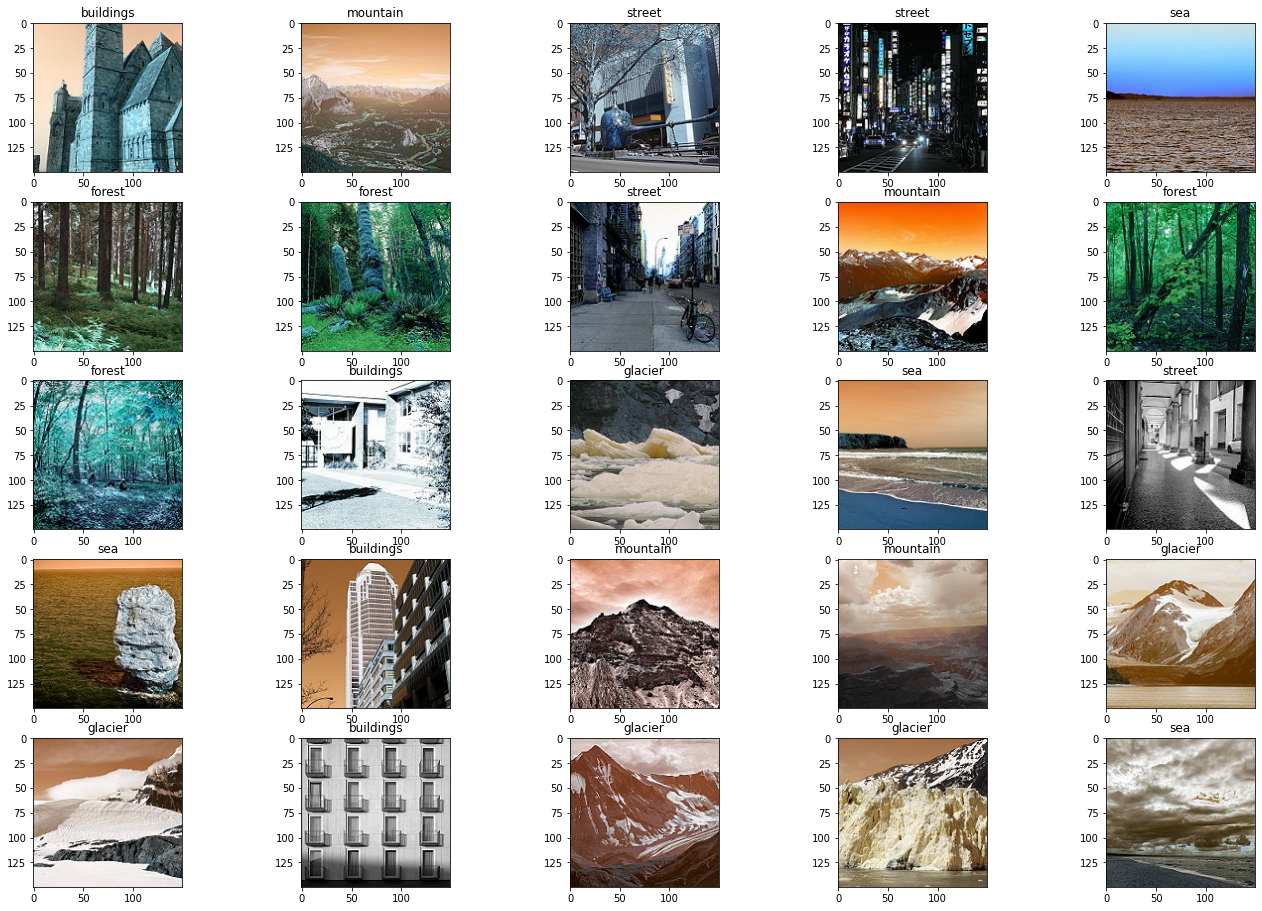

In [9]:
f, ax = plot.subplots(5, 5)
f.subplots_adjust(0, 0, 3, 3)
for i in range(0, 5):
    for j in range(0, 5):
        rand = randint(0, len(Images))
        ax[i, j].imshow(Images[rand])
        ax[i, j].set_title(get_classlabel(Labels[rand]))

In [10]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 50)        4

In [12]:
trained = model.fit(Images,Labels,epochs=25,validation_split=0.30, batch_size = 64)

Epoch 1/25
154/154 [==============================] - 246s 2s/step - loss: 1.5137 - accuracy: 0.3875 - val_loss: 1.1096 - val_accuracy: 0.5744
Epoch 2/25
154/154 [==============================] - 239s 2s/step - loss: 1.1773 - accuracy: 0.5430 - val_loss: 0.9971 - val_accuracy: 0.6464
Epoch 3/25
154/154 [==============================] - 239s 2s/step - loss: 1.0073 - accuracy: 0.6282 - val_loss: 0.8670 - val_accuracy: 0.6796
Epoch 4/25
154/154 [==============================] - 239s 2s/step - loss: 0.8941 - accuracy: 0.6715 - val_loss: 0.7966 - val_accuracy: 0.7108
Epoch 5/25
154/154 [==============================] - 239s 2s/step - loss: 0.8000 - accuracy: 0.7157 - val_loss: 0.7068 - val_accuracy: 0.7393
Epoch 6/25
154/154 [==============================] - 239s 2s/step - loss: 0.7389 - accuracy: 0.7371 - val_loss: 0.8316 - val_accuracy: 0.6963
Epoch 7/25
154/154 [==============================] - 239s 2s/step - loss: 0.6936 - accuracy: 0.7578 - val_loss: 0.5735 - val_accuracy: 0.7943

In [ ]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model Accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epochs')
plot.legend(['Train', 'Test'], loc = 'upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model Loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.legend(['Train', 'Test'], loc = 'upper left')
plot.show()

In [13]:
test_images, test_labels = get_images('intel/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images, test_labels, verbose = 1)

94/94 [==============================] - 18s 188ms/step - loss: 0.5623 - accuracy: 0.8437


[0.5623167753219604, 0.843666672706604]

In [15]:
pred_images, _ = get_images('intel/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<Figure size 2160x2160 with 0 Axes>

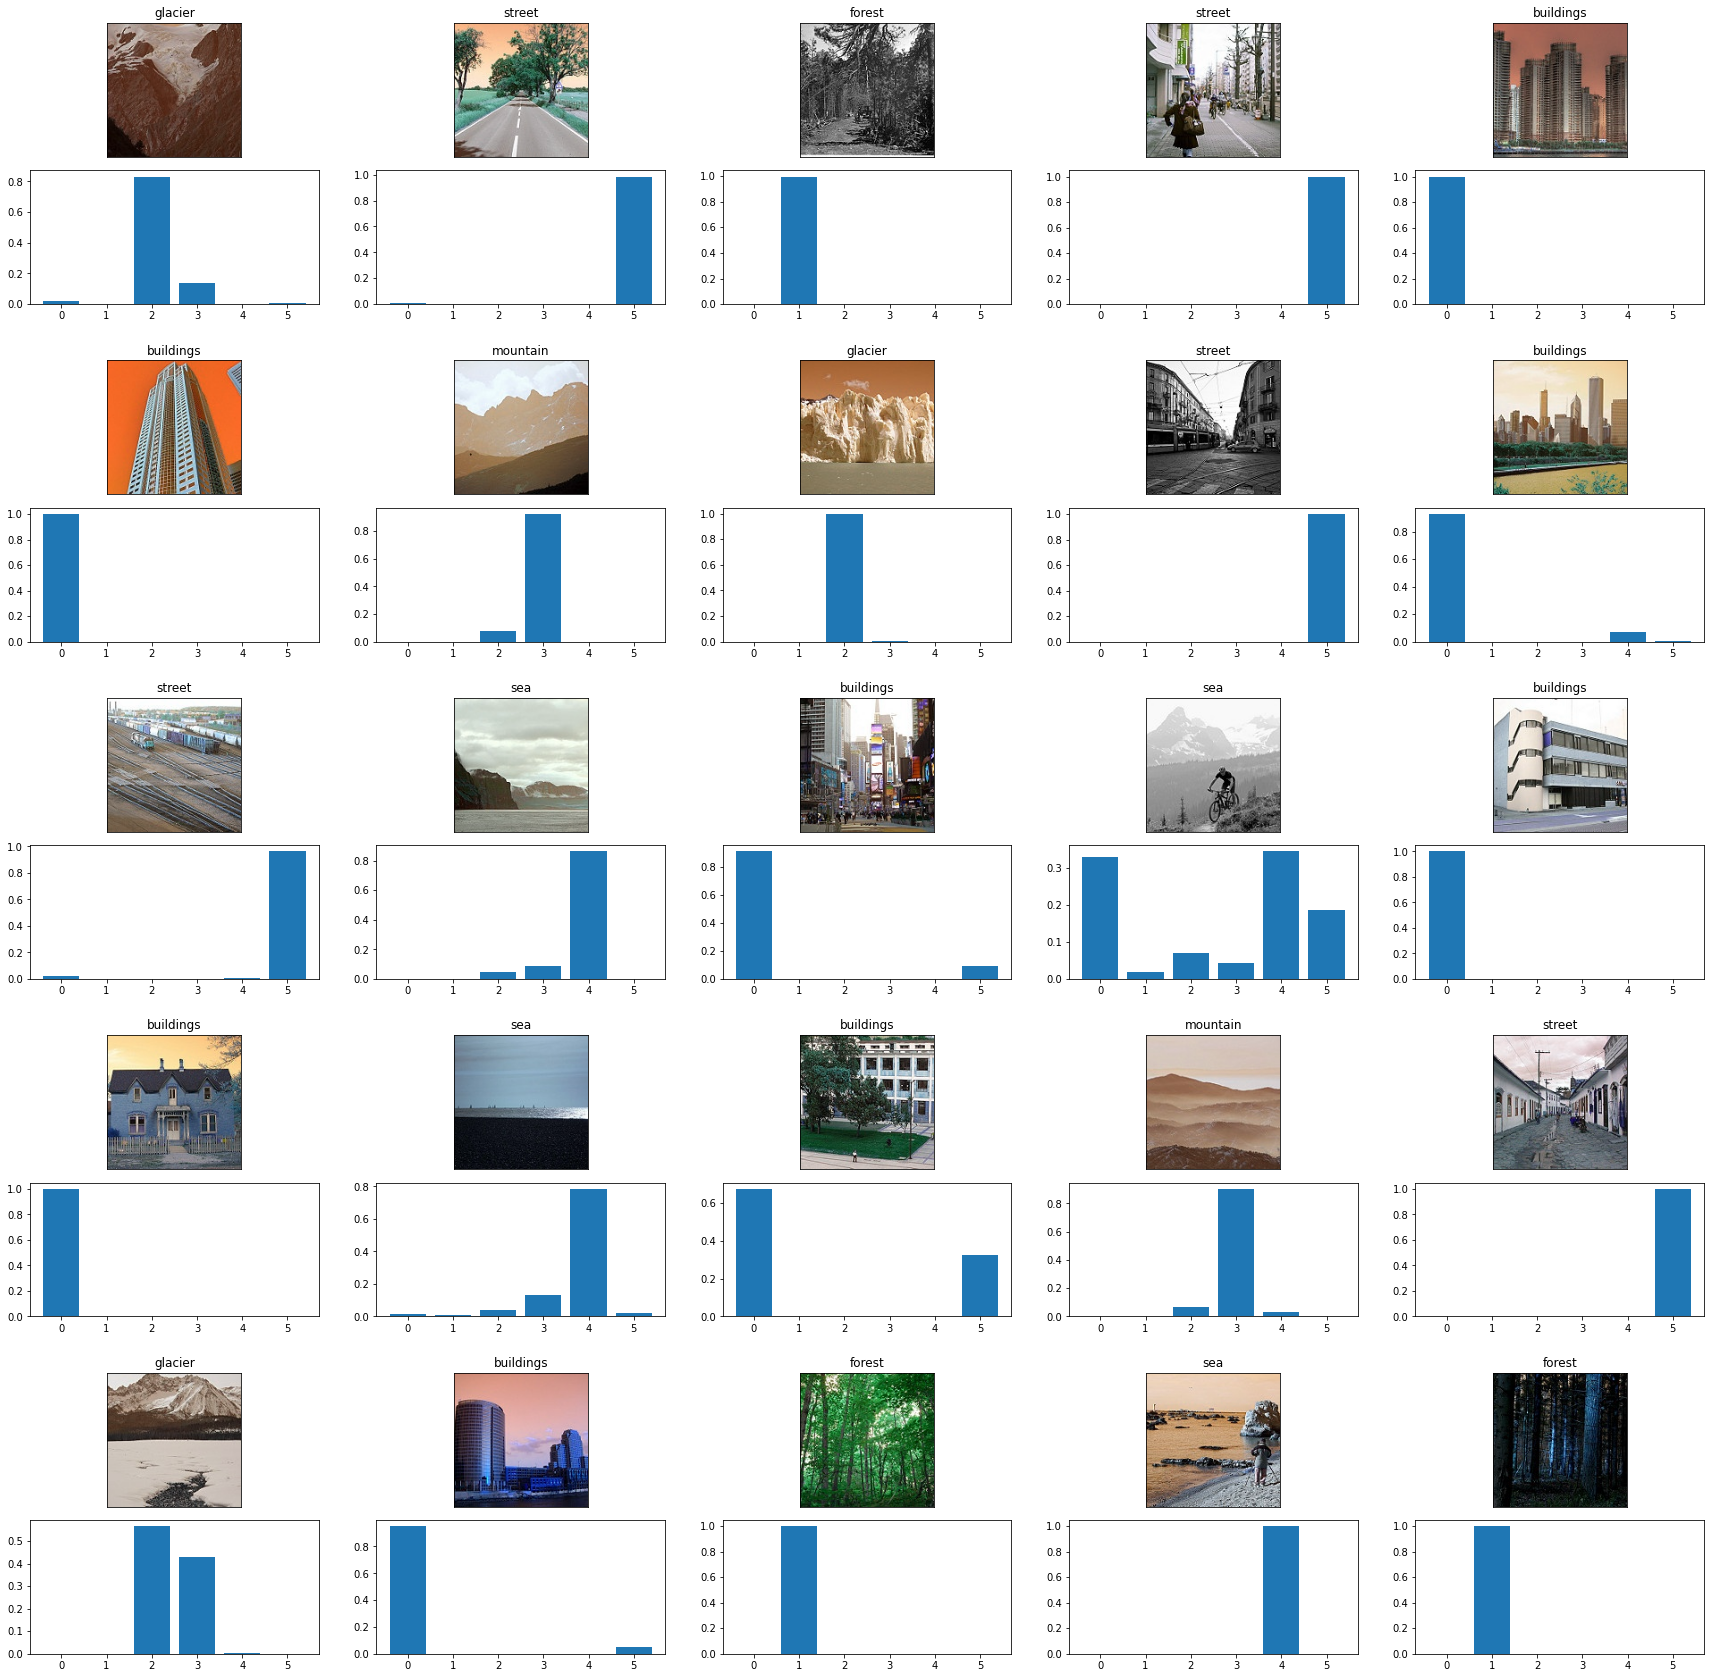

In [16]:
#display the class label on top and then the image and after that display the probabilities of each class
fig = plot.figure(figsize = (30, 30))
outer = gridspec.GridSpec(5, 5, wspace = 0.2, hspace = 0.2)

fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()